#### This is the python file which executes from Milestone 3.6


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
df_clean = pd.read_csv('Clean_data.csv')

Here we compute the correlation matrix method as defined in the data_transformation.py file. We are running this on the cleaned data setm (cleaned as defined by the applied methods in the data_transformation.py file)

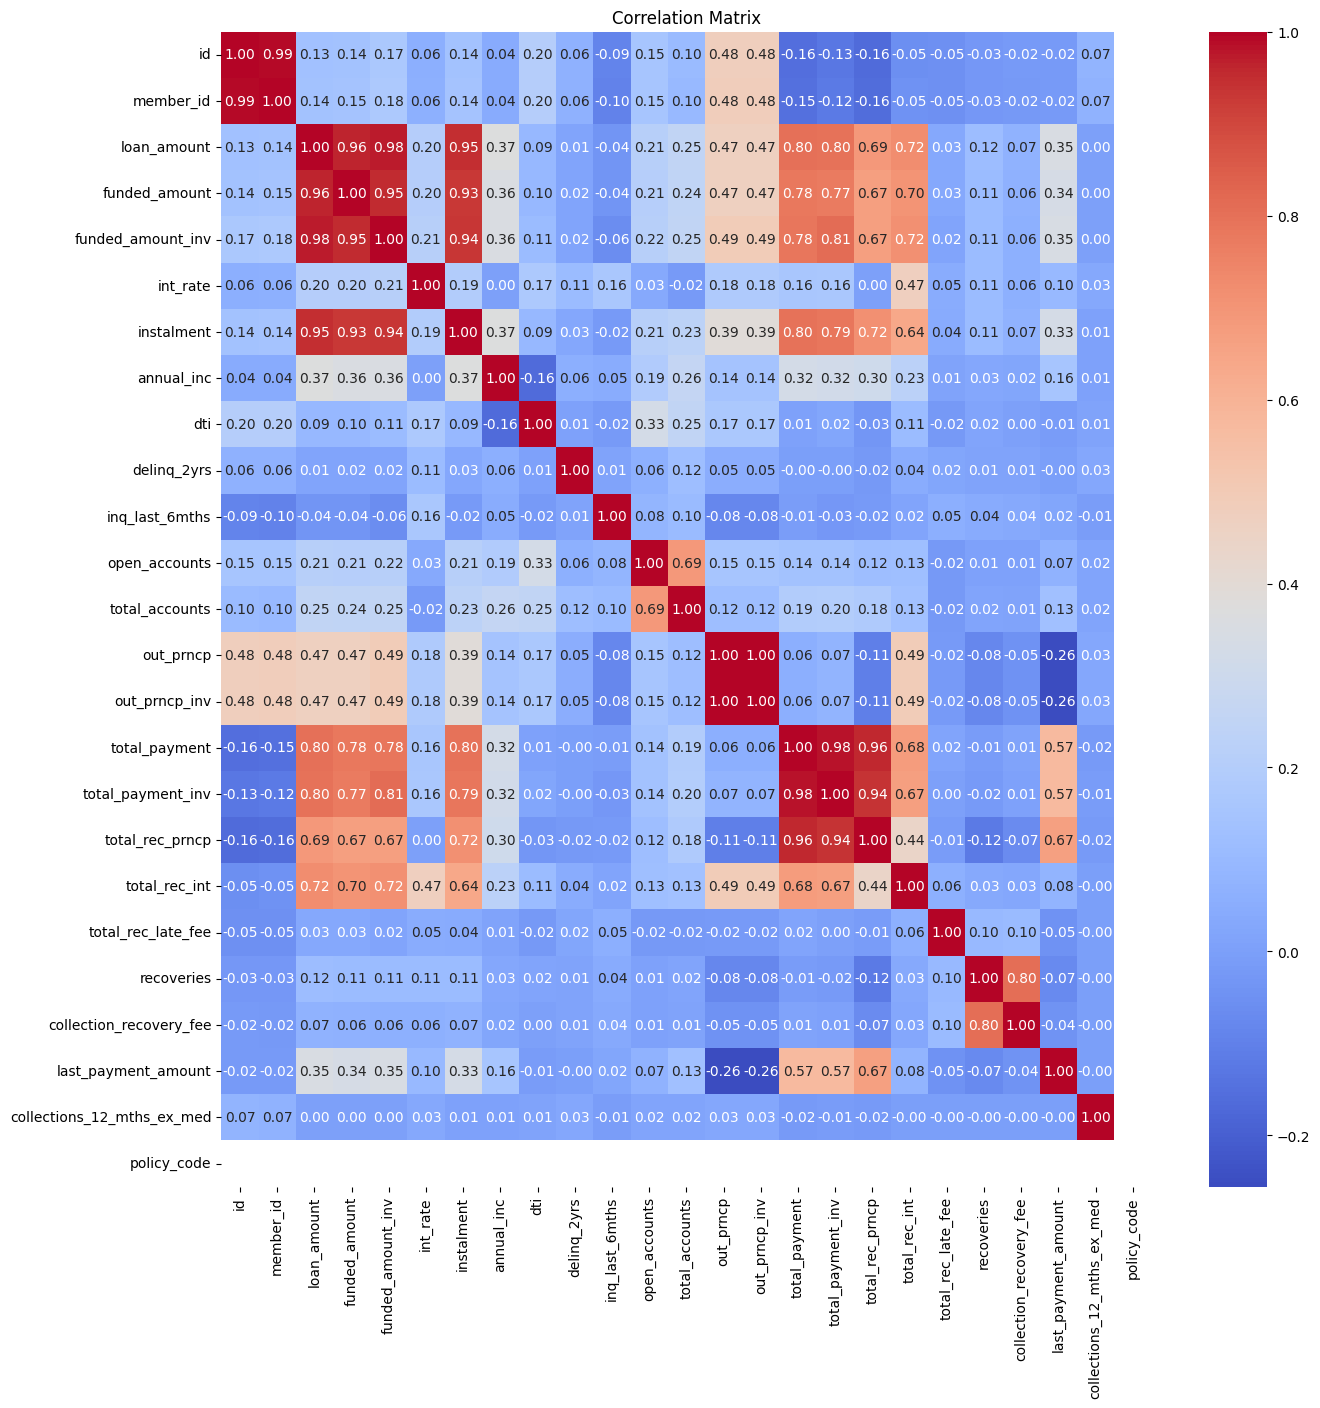

Columns to drop due to high correlation (>0.9): ['member_id', 'funded_amount', 'funded_amount_inv', 'instalment', 'out_prncp_inv', 'total_payment_inv', 'total_rec_prncp']


In [16]:
from data_transformation import DataTransformation
from data_transformation import DataFrameTransform
df_transform = DataTransformation(df_clean)
df_transform = DataFrameTransform(df_clean)
df_matrix = df_transform.remove_highly_correlated_columns(threshold=0.9)

Now we turn our attention to milestone 4. Firstly, we calulate the theoretical annual maximuum cash flow to the financial instituition by finding the product of the monthly installments and the term of the loan.

In [33]:
df_clean['total_expected_loan_amount'] = df_clean['instalment'] * df_clean['term']
print(df_clean[['instalment', 'term', 'total_expected_loan_amount']].head())

   instalment  term  total_expected_loan_amount
0      248.82  36.0                     8957.52
1      407.52  36.0                    14670.72
2      497.63  36.0                    17914.68
3      514.93  36.0                    18537.48
4      456.54  36.0                    16435.44


Summary of the percentage of loans that have been recovered compared to the total amount to be paid over the loans term including interest. Additionally calculate how much will be paid back in 6 months time with interest. Visualise your results on an appropriate graph.

Percent of Loans Currently Recovered: 95.75%


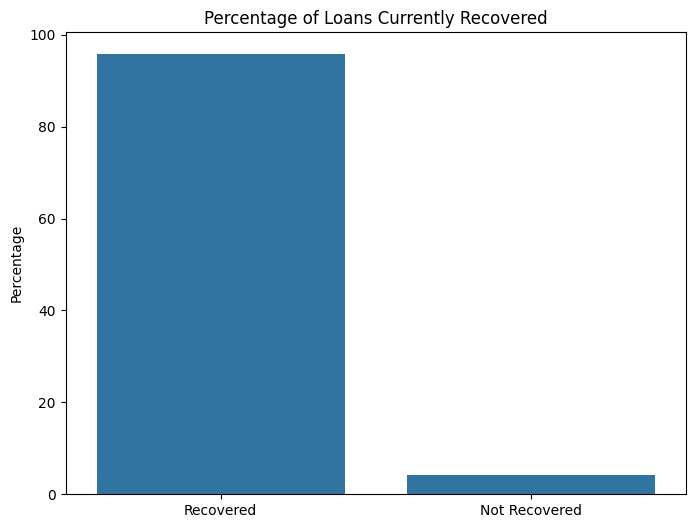

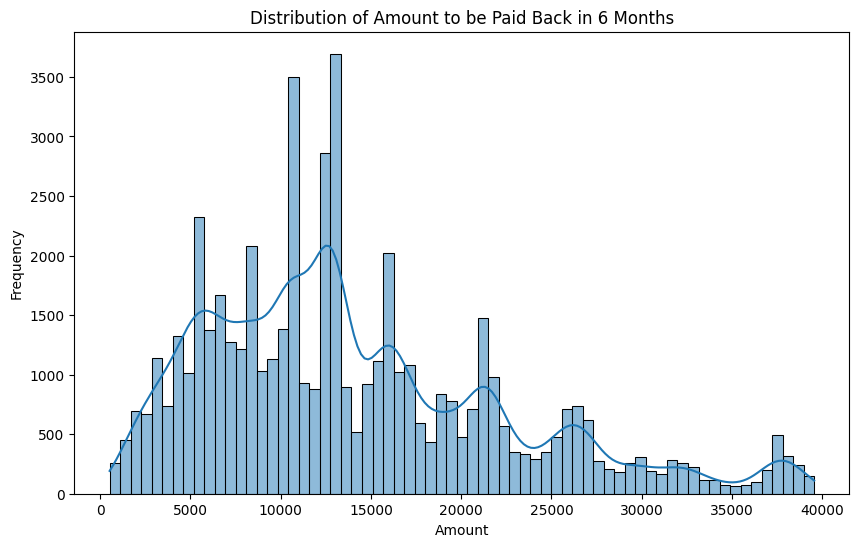

In [35]:
# Calculate the recovered ratio
df_clean['recovered_ratio'] = df_clean['total_expected_loan_amount'] / df_clean['funded_amount']

# Filter for recovered loans
recovered_loan_df = df_clean[df_clean['recovered_ratio'] >= 1]

# Calculate percentage of loans recovered
percent_of_loans_recovered = round(len(recovered_loan_df) / len(df_clean) * 100, 2)
print(f"Percent of Loans Currently Recovered: {percent_of_loans_recovered}%")

# Estimate amount to be paid back in 6 months
# Assuming 'interest_rate' is in percentage (APR)
df_clean['amount_paid_in_6_months'] = df_clean['funded_amount'] * (1 + (df_clean['int_rate'] / 100) / 2)


# Visualization of Loan Recovery Percentage
plt.figure(figsize=(8, 6))
sns.barplot(x=['Recovered', 'Not Recovered'], y=[percent_of_loans_recovered, 100 - percent_of_loans_recovered])
plt.title('Percentage of Loans Currently Recovered')
plt.ylabel('Percentage')
plt.show()

# Visualization of Amount to be Paid Back in 6 Months
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['amount_paid_in_6_months'], kde=True)
plt.title('Distribution of Amount to be Paid Back in 6 Months')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

For Milestone 4.2, we want to calculate the percentage of loans that have been lost to the financial institution.

In [36]:
# Percentage of loans indicated as being charged off

# Step 1: Filter for Charged Off loans
charged_off_df = df_clean[df_clean['loan_status'] == 'Charged Off']

# Step 2: Calculate the percentage of Charged Off loans
total_loans = len(df_clean)
charged_off_loans = len(charged_off_df)
percentage_charged_off = (charged_off_loans / total_loans) * 100

# Step 3: Calculate the total amount paid towards Charged Off loans
total_paid_charged_off = charged_off_df['total_payment'].sum()

# Step 4: Display Results
print(f"Percentage of Charged Off Loans: {percentage_charged_off:.2f}%")
print(f"Total Amount Paid Towards Charged Off Loans: ${total_paid_charged_off:.2f}")

Percentage of Charged Off Loans: 10.27%
Total Amount Paid Towards Charged Off Loans: $37400589.04


For milestone 4.3, we want to calculate projected loss:

/var/folders/pw/bystp4_n6rqf8521bv6fhrzw0000gn/T/ipykernel_88895/3337416157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_df['monthly_rate'] = (charged_off_df['int_rate'] / 100) / 12
/var/folders/pw/bystp4_n6rqf8521bv6fhrzw0000gn/T/ipykernel_88895/3337416157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_df['expected_revenue'] = (
/var/folders/pw/bystp4_n6rqf8521bv6fhrzw0000gn/T/ipykernel_88895/3337416157.py:11: SettingWithCopyWarning: 
A value is trying to be set on a cop

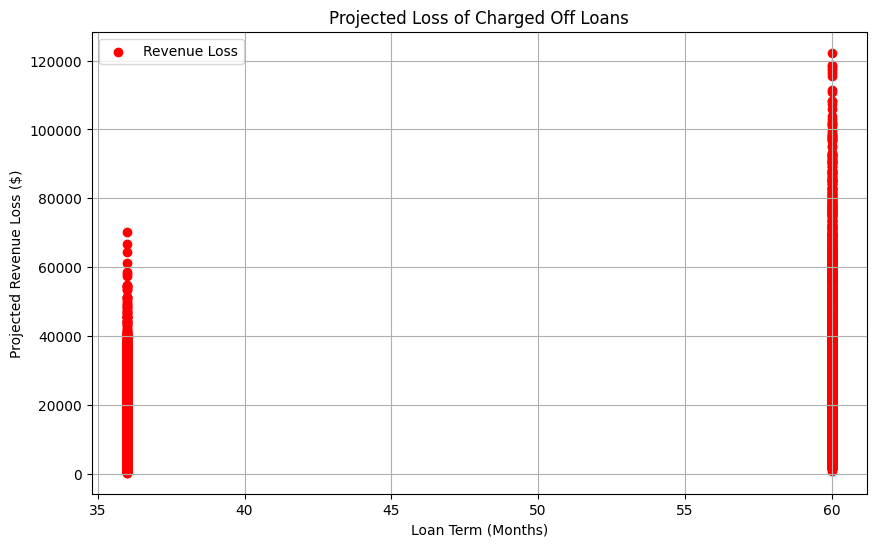

Total Projected Loss from Charged Off Loans: $112362577.19


In [38]:
# Convert annual interest rate to monthly rate
charged_off_df['monthly_rate'] = (charged_off_df['int_rate'] / 100) / 12

# Calculate Expected Revenue
charged_off_df['expected_revenue'] = (
    charged_off_df['loan_amount'] * 
    ((1 + charged_off_df['monthly_rate']) ** charged_off_df['term'])
)

# Calculate Revenue Loss
charged_off_df['revenue_loss'] = charged_off_df['expected_revenue'] - charged_off_df['total_payment']

# Prepare data for visualization
plt.figure(figsize=(10, 6))
plt.scatter(charged_off_df['term'], charged_off_df['revenue_loss'], color='red', label='Revenue Loss')
plt.title('Projected Loss of Charged Off Loans')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Projected Revenue Loss ($)')
plt.legend()
plt.grid(True)
plt.show()

# Print results
total_projected_loss = charged_off_df['revenue_loss'].sum()
print(f"Total Projected Loss from Charged Off Loans: ${total_projected_loss:.2f}")

In [40]:
# Print unique values in the 'loan_status' column
unique_loan_statuses = df_clean['loan_status'].unique()
print("Unique values in 'loan_status' column:")
print(unique_loan_statuses)

Unique values in 'loan_status' column:
['Current' 'Fully Paid' 'Charged Off' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)' 'Default'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']


Milestone 4.4: Possible loss

In [47]:
# Identify Late Payment Customers
late_statuses = ['Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period']
late_payment_df = df_clean[df_clean['loan_status'].isin(late_statuses)]

# Total number of customers
total_customers = len(df_clean)

# Number of late payment customers
num_late_payment_customers = len(late_payment_df)

# Percentage of late payment customers
percentage_late_payment_customers = (num_late_payment_customers / total_customers) * 100

print(f"Percentage of Customers Currently Late on Payments: {percentage_late_payment_customers:.2f}%")

# Total amount of customers in the Late bracket
total_late_customers_amount = late_payment_df['loan_amount'].sum()

# Calculate Expected Revenue for Late Payment Customers
late_payment_df['monthly_rate'] = (late_payment_df['int_rate'] / 100) / 12
late_payment_df['expected_revenue'] = (
    late_payment_df['loan_amount'] * 
    ((1 + late_payment_df['monthly_rate']) ** late_payment_df['term'])
)
late_payment_df['revenue_loss_if_charged_off'] = late_payment_df['expected_revenue'] - late_payment_df['total_payment']

# Total potential loss if late payment customers were charged off
total_loss_if_charged_off = late_payment_df['revenue_loss_if_charged_off'].sum()

print(f"Total Loss if Late Payment Customers Were Charged Off: ${total_loss_if_charged_off:.2f}")

# Calculate Projected Loss if Late Payment Customers Finish Full Term
late_payment_df['projected_loss_if_full_term'] = late_payment_df['expected_revenue'] - late_payment_df['total_payment']

# Total projected loss if these customers were to finish the full term
total_projected_loss_if_full_term = late_payment_df['projected_loss_if_full_term'].sum()

print(f"Total Projected Loss if Late Payment Customers Finished Full Term: ${total_projected_loss_if_full_term:.2f}")

# Total amount of already Charged Off loans
charged_off_df = df_clean[df_clean['loan_status'] == 'Charged Off']
charged_off_df['monthly_rate'] = (charged_off_df['int_rate'] / 100) / 12
charged_off_df['expected_revenue'] = (
    charged_off_df['loan_amount'] * 
    ((1 + charged_off_df['monthly_rate']) ** charged_off_df['term'])
)
charged_off_df['revenue_loss'] = charged_off_df['expected_revenue'] - charged_off_df['total_payment']

# Total expected revenue for late payment and charged off customers
total_revenue_late_payment_customers = late_payment_df['expected_revenue'].sum()
total_revenue_charged_off_customers = charged_off_df['expected_revenue'].sum()
total_expected_revenue = df_clean['total_expected_loan_amount'].sum()

percentage_of_total_revenue = (
    (total_revenue_late_payment_customers + total_revenue_charged_off_customers) / total_expected_revenue
) * 100

print(f"Percentage of Total Expected Revenue Represented by Late Payment and Charged-Off Customers: {percentage_of_total_revenue:.2f}%")

Percentage of Customers Currently Late on Payments: 1.75%
Total Loss if Late Payment Customers Were Charged Off: $18581255.54
Total Projected Loss if Late Payment Customers Finished Full Term: $18581255.54
Percentage of Total Expected Revenue Represented by Late Payment and Charged-Off Customers: 19.24%


/var/folders/pw/bystp4_n6rqf8521bv6fhrzw0000gn/T/ipykernel_88895/3261962033.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  late_payment_df['monthly_rate'] = (late_payment_df['int_rate'] / 100) / 12
/var/folders/pw/bystp4_n6rqf8521bv6fhrzw0000gn/T/ipykernel_88895/3261962033.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  late_payment_df['expected_revenue'] = (
/var/folders/pw/bystp4_n6rqf8521bv6fhrzw0000gn/T/ipykernel_88895/3261962033.py:25: SettingWithCopyWarning: 
A value is trying to be set on 

Milestone 4.5 is shown below:

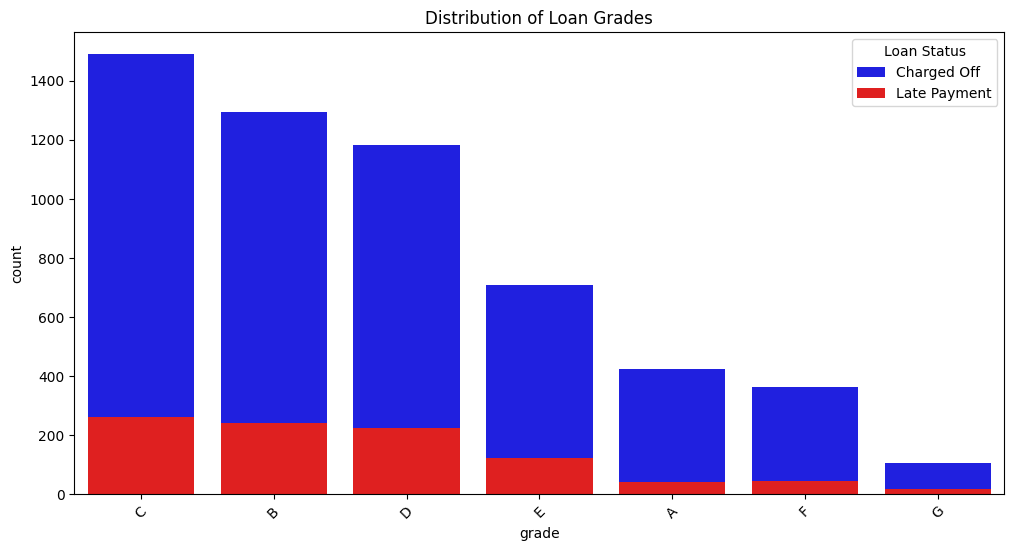

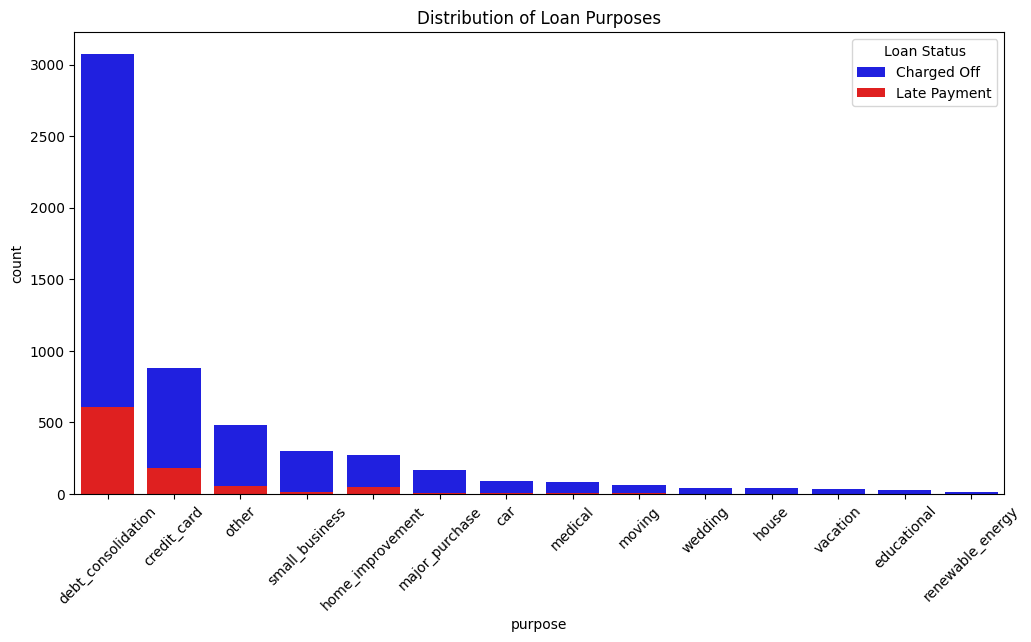

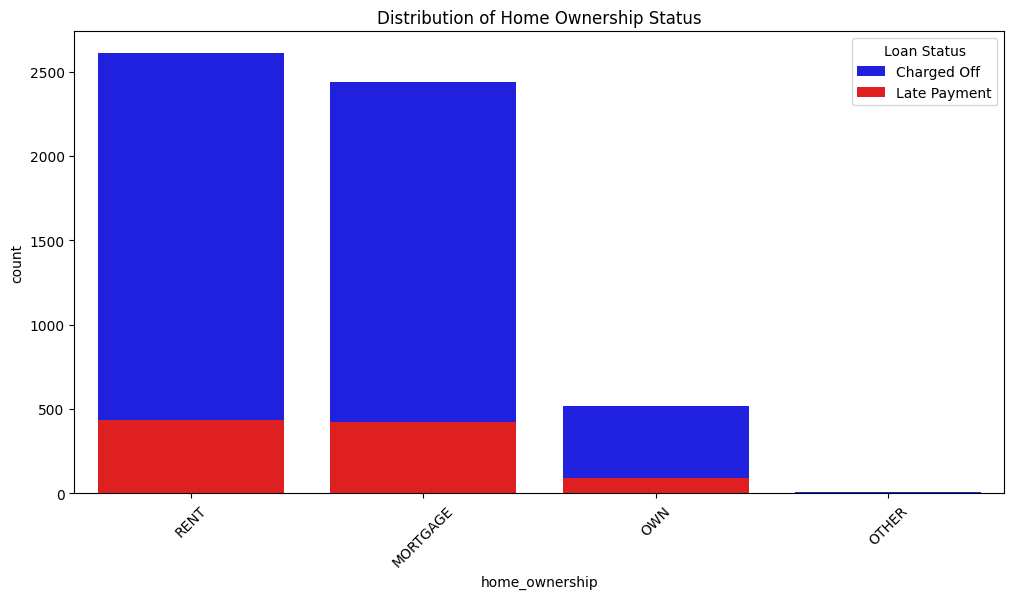

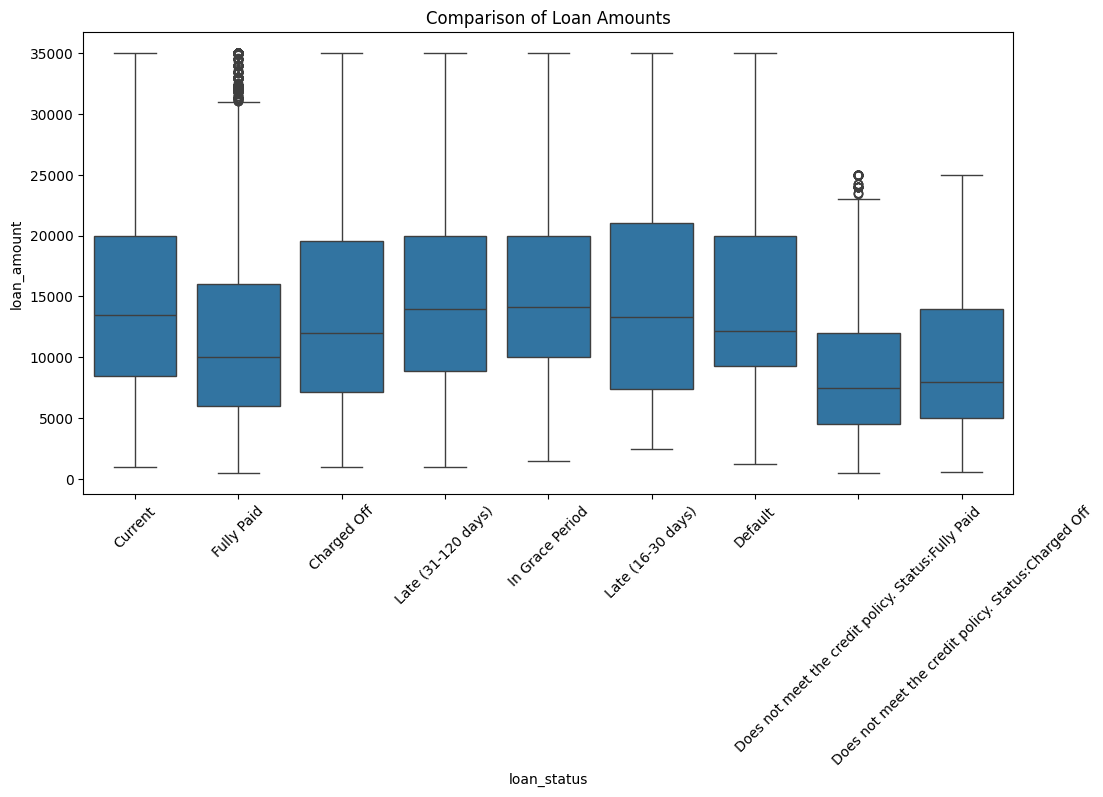

In [49]:
# Function to visualize distribution of indicators with consistent legend colors
def visualize_indicators(subset1, subset2, column, title):
    plt.figure(figsize=(12, 6))
    
    # Plot Charged Off
    sns.countplot(data=subset1, x=column, order=subset1[column].value_counts().index, color="blue", label='Charged Off')
    
    # Plot Late Payment
    sns.countplot(data=subset2, x=column, order=subset2[column].value_counts().index, color="red", label='Late Payment')
    
    plt.title(title)
    plt.legend(title='Loan Status')
    plt.xticks(rotation=45)
    plt.show()

# Analyze 'grade' column
visualize_indicators(charged_off_df, late_payment_df, 'grade', 'Distribution of Loan Grades')

# Analyze 'purpose' column
visualize_indicators(charged_off_df, late_payment_df, 'purpose', 'Distribution of Loan Purposes')

# Analyze 'home_ownership' column
visualize_indicators(charged_off_df, late_payment_df, 'home_ownership', 'Distribution of Home Ownership Status')

# Additional Analysis
# Boxplot to compare loan amounts
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='loan_amount', data=df_clean)
plt.title('Comparison of Loan Amounts')
plt.xticks(rotation=45)
plt.show()